# QEvasion Dataset Exploration

This notebook explores the **QEvasion** dataset (Hugging Face: `ailsntua/QEvasion`), used for the project:

*Unmasking Political Question Evasions*

We focus on:
- The structure of the dataset (splits, columns)
- The distributions of:
  - **Clarity labels** (Task 1)
  - **Evasion labels** (Task 2)
- Basic text statistics (length of questions/answers)
- Distributions per president
- The role of `annotator1`, `annotator2`, `annotator3` in the **test** split for Task 2

**Important:**  
For **Task 1 (Clarity)**, the column `clarity_label` is fully annotated in both `train` and `test`.  
For **Task 2 (Evasion)**:
- In `train`, the column `evasion_label` gives a single gold evasion label per example.  
- In `test`, `evasion_label` is empty: instead, we have three annotator columns (`annotator1`, `annotator2`, `annotator3`). Any of these annotator labels is considered correct.


### 1. Imports & dataset loading

In [42]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots a bit nicer
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.grid"] = True

# Load QEvasion from Hugging Face
dataset = load_dataset("ailsntua/QEvasion")
dataset


DatasetDict({
    train: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 3448
    })
    test: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 308
    })
})

### 2. Inspect splits & columns

In [43]:
# Show available splits
dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 3448
    })
    test: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 308
    })
})

In [44]:
# Column names in each split
print("Train columns:", dataset["train"].column_names)
print("Test columns :", dataset["test"].column_names)

Train columns: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label']
Test columns : ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label']


In [45]:
# Look at one example from train
example_train = dataset["train"][0]
for k, v in example_train.items():
    print(f"{k}: {repr(v)[:200]}")

title: "The President's News Conference in Hanoi, Vietnam"
date: 'September 10, 2023'
president: 'Joseph R. Biden'
url: 'https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-hanoi-vietnam-0'
question_order: 1
interview_question: 'Q. Of the Biden administration. And accused the United States of containing China while pushing for diplomatic talks.How would you respond to that? And do you think President Xi is being sincere abou
interview_answer: "Well, look, first of all, theI am sincere about getting the relationship right. And one of the things that is going on now is, China is beginning to change some of the rules of the game, in terms of 
gpt3.5_summary: 'The question consists of 2 parts: \n1. How would you respond to the accusation that the United States is containing China while pushing for diplomatic talks?\n2. Do you think President Xi is being si
gpt3.5_prediction: "Question part: 1. How would you respond to the accusation that the United States is containing

In [46]:
# Look at one example from test
example_test = dataset["test"][0]
for k, v in example_test.items():
    print(f"{k}: {repr(v)[:200]}")

title: None
date: None
president: None
url: 'https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-3'
question_order: 5
interview_question: 'Q. What about the redline, sir?'
interview_answer: "Well, the world has made it clear that these tests caused us to come together and work in the United Nations to send a clear message to the North Korean regime. We're bound up together with a common 
gpt3.5_summary: None
gpt3.5_prediction: None
question: ' Inquiring about the status or information regarding the redline.'
annotator_id: None
annotator1: 'Dodging'
annotator2: 'General'
annotator3: 'Dodging'
inaudible: False
multiple_questions: False
affirmative_questions: True
index: 0
clarity_label: 'Ambivalent'
evasion_label: ''


### 3. Convert splits to pandas DataFrames

For exploration it is convenient to work with pandas.  
We will create:

- `train_df` from `dataset["train"]`
- `test_df` from `dataset["test"]`

In [47]:
train_df = dataset["train"].to_pandas()
test_df  = dataset["test"].to_pandas()

train_df.head()[[
    "title",
    "date",
    "president",
    "interview_question",
    "interview_answer",
    "clarity_label",
    "evasion_label",
]]

,title,date,president,interview_question,interview_answer,clarity_label,evasion_label
0,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",Clear Reply,Explicit
1,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",Ambivalent,General
2,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",Ambivalent,Partial/half-answer
3,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",Ambivalent,Dodging
4,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",Clear Reply,Explicit


In [48]:
test_df.head()[[
    "title",
    "date",
    "president",
    "interview_question",
    "interview_answer",
    "clarity_label",
    "evasion_label",
]]

,title,date,president,interview_question,interview_answer,clarity_label,evasion_label
0,None,None,None,"Q. What about the redline, sir?","Well, the world has made it clear that these t...",Ambivalent,
1,None,None,None,Q. Will you invite them to the White House to ...,I think that anytime and anyplace that they ar...,Ambivalent,
2,None,None,None,"Q. Harsh. Mr. President, Japan has dropped the...",I think that the purpose of the U.N. Security ...,Ambivalent,
3,None,None,None,Q. The Lebanese Prime Minister is demanding a ...,I'll let Condi talk about the details of what ...,Ambivalent,
4,None,None,None,"Q. Thank you, Mr. President. Back on Iraq, a g...","No, I don't consider it a credible report; nei...",Ambivalent,


We see that there is no title, date, president or evasion label in the test dataset.

### 4. Label distributions

We look at the distribution of:
- **Clarity labels** in train and test
- **Evasion labels** in train
- **Annotator labels** in test (for Task 2)

This gives us an idea of class imbalance and coverage.


In [49]:
print("=== Clarity labels – TRAIN ===")
print(train_df["clarity_label"].value_counts(), "\n")

print("=== Clarity labels – TEST ===")
print(test_df["clarity_label"].value_counts())


=== Clarity labels – TRAIN ===
clarity_label
Ambivalent         2040
Clear Reply        1052
Clear Non-Reply     356
Name: count, dtype: int64 

=== Clarity labels – TEST ===
clarity_label
Ambivalent         206
Clear Reply         79
Clear Non-Reply     23
Name: count, dtype: int64


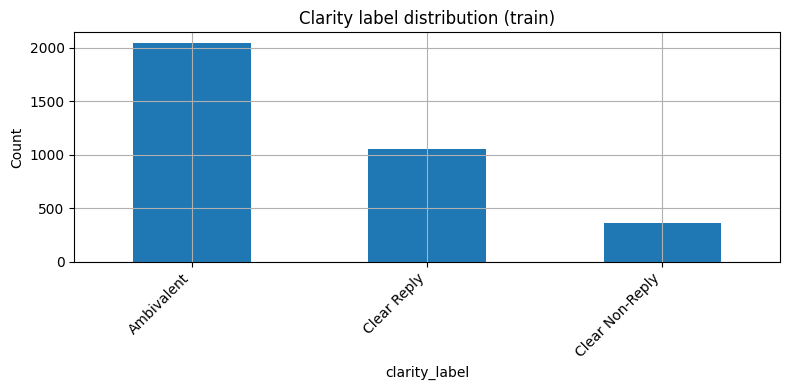

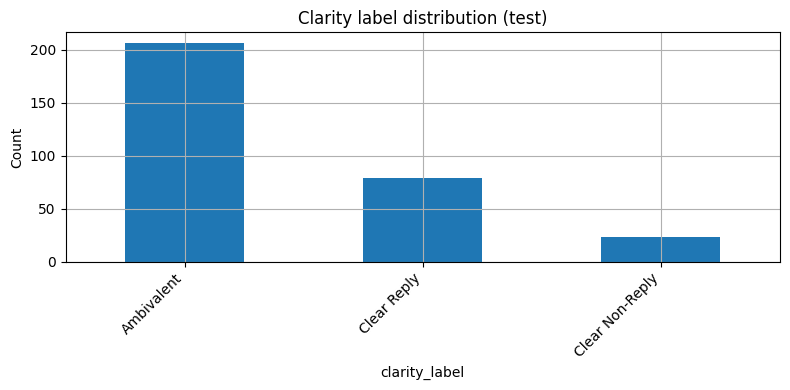

In [50]:
# Bar plots for clarity labels
train_df["clarity_label"].value_counts().plot(kind="bar")
plt.title("Clarity label distribution (train)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

test_df["clarity_label"].value_counts().plot(kind="bar")
plt.title("Clarity label distribution (test)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [51]:
print("=== Evasion labels – TRAIN ===")
print(train_df["evasion_label"].value_counts(), "\n")


=== Evasion labels – TRAIN ===
evasion_label
Explicit               1052
Dodging                 706
Implicit                488
General                 386
Deflection              381
Declining to answer     145
Claims ignorance        119
Clarification            92
Partial/half-answer      79
Name: count, dtype: int64 



In [52]:
print("=== Evasion label – TEST (should be mostly empty) ===")
print(test_df["evasion_label"].value_counts(dropna=False), "\n")

print("=== Annotator1 – TEST ===")
print(test_df["annotator1"].value_counts(dropna=False), "\n")

print("=== Annotator2 – TEST ===")
print(test_df["annotator2"].value_counts(dropna=False), "\n")

print("=== Annotator3 – TEST ===")
print(test_df["annotator3"].value_counts(dropna=False))


=== Evasion label – TEST (should be mostly empty) ===
evasion_label
    308
Name: count, dtype: int64 

=== Annotator1 – TEST ===
annotator1
Explicit               106
Dodging                 58
Implicit                54
Deflection              30
General                 29
Declining to answer     10
Claims ignorance         9
Partial/half-answer      8
Clarification            4
Name: count, dtype: int64 

=== Annotator2 – TEST ===
annotator2
General                78
Dodging                72
Implicit               54
Explicit               53
Deflection             22
Claims ignorance       11
Declining to answer     9
Partial/half-answer     5
Clarification           4
Name: count, dtype: int64 

=== Annotator3 – TEST ===
annotator3
Explicit               80
Implicit               67
General                65
Dodging                43
Deflection             23
Declining to answer    14
Claims ignorance        7
Partial/half-answer     5
Clarification           4
Name: count, dtype

> **Observation:**  
> - In `train`, `evasion_label` is a single gold label per example for Task 2.  
> - In `test`, `evasion_label` is (by design) empty for Task 2. Instead, we have three labels: `annotator1`, `annotator2`, `annotator3`.  
>   For evaluation of Task 2 on the test split, **any of the annotator labels is considered correct**, i.e.\ the ground truth is the *set* of labels provided by the annotators.


### 5. Text length statistics

We examine the lengths (in words) of:
- `interview_question`
- `interview_answer`
- question + answer combined

This will help later when choosing maximum sequence lengths for transformer models.


In [53]:
def add_lengths(df):
    df = df.copy()
    df["q_len"] = df["interview_question"].fillna("").apply(lambda x: len(x.split()))
    df["a_len"] = df["interview_answer"].fillna("").apply(lambda x: len(x.split()))
    df["qa_len"] = df["q_len"] + df["a_len"]
    return df

train_df = add_lengths(train_df)
test_df  = add_lengths(test_df)

train_df[["q_len", "a_len", "qa_len"]].describe()


,q_len,a_len,qa_len
count,3448.000000,3448.000000,3448.000000
mean,61.506090,293.572216,355.078306
std,59.859859,301.541101,329.973732
min,3.000000,1.000000,5.000000
25%,22.000000,56.000000,101.000000
50%,50.000000,207.000000,257.000000
75%,82.000000,440.000000,520.000000
max,780.000000,2117.000000,2212.000000


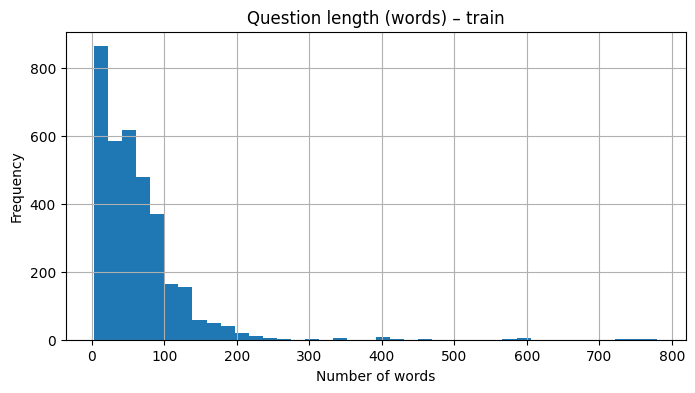

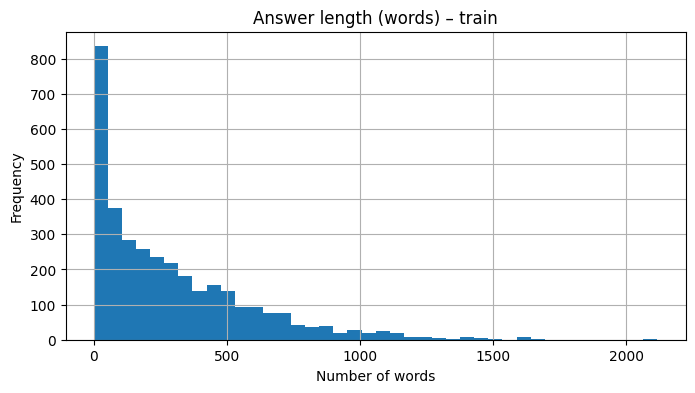

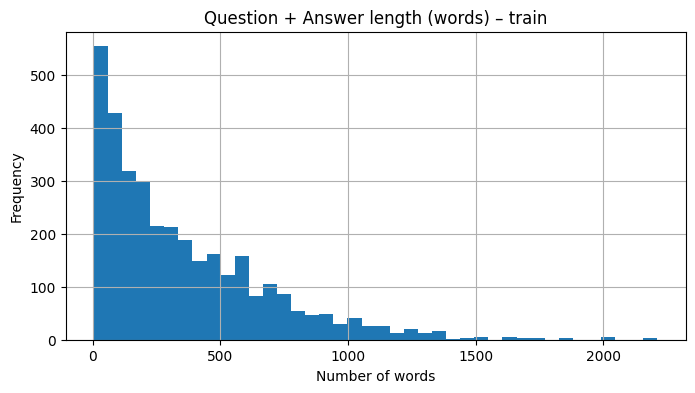

In [54]:
plt.hist(train_df["q_len"], bins=40)
plt.title("Question length (words) – train")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

plt.hist(train_df["a_len"], bins=40)
plt.title("Answer length (words) – train")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

plt.hist(train_df["qa_len"], bins=40)
plt.title("Question + Answer length (words) – train")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()


### 6. Distributions per president

The dataset includes a `president` column (e.g.\ Bush, Obama, Trump, Biden).  
We explore:
- How many examples per president
- How clarity labels are distributed per president
- How evasion labels are distributed per president (on the train split)


In [55]:
print("=== Examples per president - TRAIN ===")
print(train_df["president"].value_counts(), "\n")

print("=== Examples per president - TEST ===")
print(test_df["president"].value_counts())


=== Examples per president - TRAIN ===
president
Donald J. Trump    1325
Barack Obama       1010
George W. Bush      714
Joseph R. Biden     399
Name: count, dtype: int64 

=== Examples per president - TEST ===
Series([], Name: count, dtype: int64)


In [56]:
clarity_pres = pd.crosstab(train_df["president"], train_df["clarity_label"])
clarity_pres


clarity_label,Ambivalent,Clear Non-Reply,Clear Reply
president,,,
Barack Obama,688,96,226
Donald J. Trump,737,156,432
George W. Bush,407,62,245
Joseph R. Biden,208,42,149


In [ ]:
clarity_pres.plot(kind="bar", stacked=True)
plt.title("Clarity labels per president (train)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
evasion_pres = pd.crosstab(train_df["president"], train_df["evasion_label"])
evasion_pres


evasion_label,Claims ignorance,Clarification,Declining to answer,Deflection,Dodging,Explicit,General,Implicit,Partial/half-answer
president,,,,,,,,,
Barack Obama,22,28,46,104,234,226,145,182,23
Donald J. Trump,65,37,54,146,266,432,139,160,26
George W. Bush,18,18,26,88,136,245,70,103,10
Joseph R. Biden,14,9,19,43,70,149,32,43,20
